In [2]:
import numpy as np
import pandas as pd
import seaborn as sn
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
%matplotlib inline

# load data
df = pd.read_csv("9_Exercise.csv")

# preprocessing
df.drop("CustomerId", axis="columns", inplace = True)
df.drop("Surname", axis="columns", inplace = True)
df.drop("RowNumber", axis="columns", inplace = True)
df = pd.get_dummies(data=df, columns=['Geography','Gender'])

cols_to_scale = ['Balance','CreditScore','Age', "NumOfProducts", "Tenure", "EstimatedSalary"]
scaler = MinMaxScaler()
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

df.sample(10)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
6138,0.254,0.391892,0.9,0.577528,0.000000,1,0,0.306548,1,1,0,0,0,1
4639,0.878,0.121622,0.8,0.263860,0.000000,1,1,0.397271,0,1,0,0,1,0
4996,0.300,0.351351,0.9,0.641050,0.333333,1,0,0.981344,0,0,1,0,0,1
3932,0.660,0.067568,0.5,0.558024,0.000000,0,1,0.158528,0,1,0,0,0,1
2221,0.834,0.229730,0.6,0.527119,0.000000,1,0,0.577830,1,0,1,0,1,0
5783,0.548,0.716216,0.7,0.000000,0.333333,1,1,0.544203,0,1,0,0,0,1
8647,0.188,0.337838,0.3,0.000000,0.333333,1,1,0.795674,0,1,0,0,0,1
1824,0.896,0.256757,0.4,0.445293,0.000000,1,1,0.417373,0,1,0,0,1,0
9380,0.554,0.702703,0.1,0.376315,0.000000,0,1,0.726509,0,1,0,0,0,1
1942,0.668,0.364865,0.6,0.590165,0.000000,1,0,0.917905,0,1,0,0,0,1


In [3]:
# create train and test sets
X = df.drop("Exited", axis="columns")
y = df["Exited"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=5)

X_train.shape

(8000, 13)

In [12]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
7751,0.800,0.283784,0.6,0.000000,0.333333,0,0,0.096273,0,0,1,1,0
4154,0.752,0.216216,0.3,0.000000,0.333333,1,0,0.981478,1,0,0,0,1
3881,0.476,0.621622,0.3,0.000000,0.000000,1,1,0.948551,1,0,0,1,0
9238,0.846,0.432432,0.4,0.000000,0.333333,1,0,0.646869,1,0,0,1,0
5210,0.402,0.229730,0.7,0.517012,0.333333,0,0,0.434670,1,0,0,0,1


In [5]:
# build model
model = keras.Sequential([
    keras.layers.Dense(13, input_shape=(13, ), activation="relu"), # Input Layer / hidden layer
    keras.layers.Dense(1, activation="sigmoid") # Output layer
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

In [6]:
# train the model
model.fit(X_train, y_train, epochs=10)

Epoch 1/10
250/250 [==============================] - 1s 1ms/step - loss: 0.5914 - accuracy: 0.6745
Epoch 2/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4756 - accuracy: 0.7966
Epoch 3/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4670 - accuracy: 0.7985
Epoch 4/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4597 - accuracy: 0.8018
Epoch 5/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4527 - accuracy: 0.8048
Epoch 6/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4454 - accuracy: 0.8092
Epoch 7/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4379 - accuracy: 0.8105
Epoch 8/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4301 - accuracy: 0.8140
Epoch 9/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4220 - accuracy: 0.8163
Epoch 10/10
250/250 [==============================] - 0s 1ms/step - loss: 0.4145 - accuracy: 0.8183

In [7]:
# evaluate model
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 952us/step - loss: 0.4164 - accuracy: 0.8140


[0.4163673222064972, 0.8140000104904175]

In [8]:
# predict test sets
y_pred = model.predict(X_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0

# print prediction vs actual side by side
np.c_[y_pred[:20], y_test[:20]]

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

In [9]:
# create classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89      1595
           1       0.65      0.18      0.28       405

    accuracy                           0.81      2000
   macro avg       0.74      0.58      0.58      2000
weighted avg       0.79      0.81      0.77      2000



Text(69.0, 0.5, 'Actual')

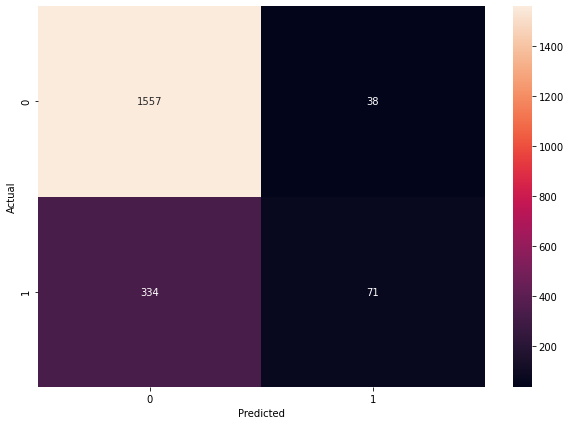

In [10]:
# plot it
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_pred)

plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")